In [1]:
import sys
print(sys.executable)

C:\Users\treye\anaconda3\envs\curling\python.exe


In [2]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
stones = pd.read_csv("C:/Users/treye/Downloads/Stones.csv", low_memory = False)
teams = pd.read_csv("C:/Users/treye/Downloads/Teams.csv", low_memory = False)
games = pd.read_csv("C:/Users/treye/Downloads/Games.csv", low_memory = False)
ends = pd.read_csv("C:/Users/treye/Downloads/Ends.csv", low_memory = False)
competitors = pd.read_csv("C:/Users/treye/Downloads/Competitors.csv", low_memory = False)
competition = pd.read_csv("C:/Users/treye/Downloads/Competition.csv", low_memory = False)

In [4]:
ends

,CompetitionID,SessionID,GameID,TeamID,EndID,Result,PowerPlay
0,0,1,1,19,1,0,NaN
1,0,1,1,27,1,1,NaN
2,0,1,1,19,2,2,NaN
3,0,1,1,27,2,0,NaN
4,0,1,1,19,3,0,NaN
...,...,...,...,...,...,...,...
5269,24250026,49,1,24,5,1,NaN
5270,24250026,49,1,14,6,3,2.0
5271,24250026,49,1,24,6,0,NaN
5272,24250026,49,1,14,7,0,NaN


In [5]:
stones

,CompetitionID,SessionID,GameID,EndID,ShotID,TeamID,PlayerID,Task,Handle,Points,...,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y
0,0,1,1,1,7,19,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,1,1,8,27,1,0,1,2,...,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,9,19,2,0,0,4,...,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,1,16,27,2,0,0,0,...,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,1,17,19,2,7,0,3,...,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26365,24250026,49,1,7,18,24,2,9,0,4,...,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0
26366,24250026,49,1,7,19,14,2,0,0,3,...,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0
26367,24250026,49,1,7,20,24,2,6,0,4,...,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0
26368,24250026,49,1,7,21,14,1,0,0,4,...,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0


In [6]:
ends["PowerPlay"] = ends["PowerPlay"].replace("", np.nan)
ends["PowerPlay"] = pd.to_numeric(ends["PowerPlay"], errors="coerce")
shots = stones.merge(ends, on = ["CompetitionID", "SessionID", "GameID", "TeamID", "EndID"], how = "left")
shots

,CompetitionID,SessionID,GameID,EndID,ShotID,TeamID,PlayerID,Task,Handle,Points,...,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,Result,PowerPlay
0,0,1,1,1,7,19,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
1,0,1,1,1,8,27,1,0,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
2,0,1,1,1,9,19,2,0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
3,0,1,1,1,16,27,2,0,0,0,...,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN
4,0,1,1,1,17,19,2,7,0,3,...,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26365,24250026,49,1,7,18,24,2,9,0,4,...,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,4,NaN
26366,24250026,49,1,7,19,14,2,0,0,3,...,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,0,NaN
26367,24250026,49,1,7,20,24,2,6,0,4,...,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0,4,NaN
26368,24250026,49,1,7,21,14,1,0,0,4,...,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0,0,NaN


In [7]:
pd.set_option('display.max_columns', None)

In [8]:
ends["PowerPlay"].value_counts()

PowerPlay
1.0    313
2.0    285
Name: count, dtype: int64

In [9]:
shots["TotalShotNumberInEnd"] = shots.groupby(["CompetitionID", "SessionID", "GameID", "EndID"]).cumcount()+1
shots["TotalShotsRemainingInEnd"] = 10 - shots["TotalShotNumberInEnd"]
shots["PowerPlay"] = shots["PowerPlay"].fillna(0)
shots

,CompetitionID,SessionID,GameID,EndID,ShotID,TeamID,PlayerID,Task,Handle,Points,TimeOut,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,Result,PowerPlay,TotalShotNumberInEnd,TotalShotsRemainingInEnd
0,0,1,1,1,7,19,1,0,0,0,NaN,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,9
1,0,1,1,1,8,27,1,0,1,2,NaN,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,2,8
2,0,1,1,1,9,19,2,0,0,4,NaN,750.0,1916.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3,7
3,0,1,1,1,16,27,2,0,0,0,NaN,963.0,1657.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,4,6
4,0,1,1,1,17,19,2,7,0,3,NaN,963.0,1657.0,4095.0,4095.0,694.0,756.0,636.0,1080.0,0.0,0.0,0.0,0.0,750.0,650.0,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26365,24250026,49,1,7,18,24,2,9,0,4,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,0.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,4,0.0,6,4
26366,24250026,49,1,7,19,14,2,0,0,3,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,760.0,1152.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,0,0.0,7,3
26367,24250026,49,1,7,20,24,2,6,0,4,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,4095.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0,4,0.0,8,2
26368,24250026,49,1,7,21,14,1,0,0,4,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,4095.0,0.0,781.0,804.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0,0,0.0,9,1


In [10]:
shots["HasHammer"] = shots["TotalShotNumberInEnd"].apply(lambda x:1 if x in [2,4,6,8,10] else 0)
shots

,CompetitionID,SessionID,GameID,EndID,ShotID,TeamID,PlayerID,Task,Handle,Points,TimeOut,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,Result,PowerPlay,TotalShotNumberInEnd,TotalShotsRemainingInEnd,HasHammer
0,0,1,1,1,7,19,1,0,0,0,NaN,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,9,0
1,0,1,1,1,8,27,1,0,1,2,NaN,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,2,8,1
2,0,1,1,1,9,19,2,0,0,4,NaN,750.0,1916.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3,7,0
3,0,1,1,1,16,27,2,0,0,0,NaN,963.0,1657.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,4,6,1
4,0,1,1,1,17,19,2,7,0,3,NaN,963.0,1657.0,4095.0,4095.0,694.0,756.0,636.0,1080.0,0.0,0.0,0.0,0.0,750.0,650.0,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26365,24250026,49,1,7,18,24,2,9,0,4,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,0.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,4,0.0,6,4,1
26366,24250026,49,1,7,19,14,2,0,0,3,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,760.0,1152.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,0,0.0,7,3,0
26367,24250026,49,1,7,20,24,2,6,0,4,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,4095.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0,4,0.0,8,2,1
26368,24250026,49,1,7,21,14,1,0,0,4,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,4095.0,0.0,781.0,804.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0,0,0.0,9,1,0


In [11]:
shots["TeamPlayerID"] = (shots["TeamID"].astype(int).astype(str) 
                         + shots["PlayerID"].astype(int).astype(str)).astype(int)
shots["MatchID"] = (shots["CompetitionID"].astype(int).astype(str) 
                         + shots["SessionID"].astype(int).astype(str) + shots["GameID"].astype(int).astype(str)).astype(int)

In [12]:
shots = shots[(shots["Task"]>=0) & (shots["Task"]<=13)]

In [13]:
shots["Task"].value_counts()

Task
0     13511
3      2717
9      2088
2      2052
6      1993
10     1045
7      1025
8       936
4       455
1       160
11      133
5       113
Name: count, dtype: int64

In [14]:
shots = shots[shots["Result"] != 9]

In [15]:
shots["Result"].value_counts()

Result
0    12910
1     7170
2     3551
3     1545
4      435
5      115
6       10
Name: count, dtype: int64

In [16]:
def team_shot(df):
    df = df.copy()
    df.loc[df["HasHammer"] == 0, "TeamShotNumberInEnd"] = (
        df.loc[df["HasHammer"] == 0, "TotalShotNumberInEnd"] // 2 + 1
    )
    df.loc[df["HasHammer"] == 1, "TeamShotNumberInEnd"] = (
        df.loc[df["HasHammer"] == 1, "TotalShotNumberInEnd"] // 2
    )
    df["TeamShotsRemainingInEnd"] = 5 - df["TeamShotNumberInEnd"]
    return df
def opponent_shots_remaining(df):
    df = df.copy()
    df.loc[df["HasHammer"] == 1, "OpponentShotNumberInEnd"] = (
        df.loc[df["HasHammer"] == 1, "TotalShotNumberInEnd"] // 2
    )
    df.loc[df["HasHammer"] == 0, "OpponentShotNumberInEnd"] = (
        df.loc[df["HasHammer"] == 0, "TotalShotNumberInEnd"] // 2
    )
    df["OpponentShotsRemainingInEnd"] = 5 - df["OpponentShotNumberInEnd"]
    return df
shots = team_shot(shots)
shots = opponent_shots_remaining(shots)

In [17]:
ends["TotalGameScoreAfterEnd"] = ends.groupby(["CompetitionID", "SessionID", "GameID", 
                                       "TeamID"])["Result"].cumsum()
ends["TotalGameScoreStartOfEnd"] = ends["TotalGameScoreAfterEnd"] - ends["Result"]
ends["OpponentScoreStartOfEnd"] = ends.groupby(["CompetitionID", "SessionID", "GameID", 
                                                "EndID"])["TotalGameScoreStartOfEnd"].transform("sum") - ends["TotalGameScoreStartOfEnd"]
ends["ScoreDiffStartOfEnd"] = ends["TotalGameScoreStartOfEnd"] - ends["OpponentScoreStartOfEnd"]
ends["OpponentResult"] = ends.groupby(["CompetitionID", "SessionID", "GameID", 
                                                "EndID"])["Result"].transform("sum") - ends["Result"]
ends["EndDifferential"] = ends["Result"] - ends["OpponentResult"]
ends["EndScoringOutcome"] = ends.apply(lambda x: 0 if x["Result"] > 0 else 1 if x["OpponentResult"] > 0 else 2, axis = 1)

ends

,CompetitionID,SessionID,GameID,TeamID,EndID,Result,PowerPlay,TotalGameScoreAfterEnd,TotalGameScoreStartOfEnd,OpponentScoreStartOfEnd,ScoreDiffStartOfEnd,OpponentResult,EndDifferential,EndScoringOutcome
0,0,1,1,19,1,0,NaN,0,0,0,0,1,-1,1
1,0,1,1,27,1,1,NaN,1,0,0,0,0,1,0
2,0,1,1,19,2,2,NaN,2,0,1,-1,0,2,0
3,0,1,1,27,2,0,NaN,1,1,0,1,2,-2,1
4,0,1,1,19,3,0,NaN,2,2,1,1,3,-3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,24250026,49,1,24,5,1,NaN,5,4,1,3,0,1,0
5270,24250026,49,1,14,6,3,2.0,4,1,5,-4,0,3,0
5271,24250026,49,1,24,6,0,NaN,5,5,1,4,3,-3,1
5272,24250026,49,1,14,7,0,NaN,4,4,5,-1,4,-4,1


In [18]:
ends["EndScoringOutcome"].value_counts()

EndScoringOutcome
0    2692
1    2572
2      10
Name: count, dtype: int64

In [19]:
shots = shots.merge(ends[["CompetitionID", "SessionID", "GameID", "EndID", "TeamID", "TotalGameScoreStartOfEnd", "OpponentScoreStartOfEnd", "ScoreDiffStartOfEnd", "OpponentResult", "EndDifferential", "EndScoringOutcome"]], 
                    on = ["CompetitionID", "SessionID", "GameID", "EndID", "TeamID"], how = "left")
shots

,CompetitionID,SessionID,GameID,EndID,ShotID,TeamID,PlayerID,Task,Handle,Points,TimeOut,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,Result,PowerPlay,TotalShotNumberInEnd,TotalShotsRemainingInEnd,HasHammer,TeamPlayerID,MatchID,TeamShotNumberInEnd,TeamShotsRemainingInEnd,OpponentShotNumberInEnd,OpponentShotsRemainingInEnd,TotalGameScoreStartOfEnd,OpponentScoreStartOfEnd,ScoreDiffStartOfEnd,OpponentResult,EndDifferential,EndScoringOutcome
0,0,1,1,1,7,19,1,0,0,0,NaN,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1,9,0,191,11,1.0,4.0,0.0,5.0,0,0,0,1,-1,1
1,0,1,1,1,8,27,1,0,1,2,NaN,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,2,8,1,271,11,1.0,4.0,1.0,4.0,0,0,0,0,1,0
2,0,1,1,1,9,19,2,0,0,4,NaN,750.0,1916.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,3,7,0,192,11,2.0,3.0,1.0,4.0,0,0,0,1,-1,1
3,0,1,1,1,16,27,2,0,0,0,NaN,963.0,1657.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.0,4,6,1,272,11,2.0,3.0,2.0,3.0,0,0,0,0,1,0
4,0,1,1,1,17,19,2,7,0,3,NaN,963.0,1657.0,4095.0,4095.0,694.0,756.0,636.0,1080.0,0.0,0.0,0.0,0.0,750.0,650.0,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,5,5,0,192,11,3.0,2.0,2.0,3.0,0,0,0,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25731,24250026,49,1,7,18,24,2,9,0,4,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,0.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,4,0.0,6,4,1,242,24250026491,3.0,2.0,3.0,2.0,5,4,1,0,4,0
25732,24250026,49,1,7,19,14,2,0,0,3,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,760.0,1152.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,0,0.0,7,3,0,142,24250026491,4.0,1.0,3.0,2.0,4,5,-1,4,-4,1
25733,24250026,49,1,7,20,24,2,6,0,4,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,4095.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0,4,0.0,8,2,1,242,24250026491,4.0,1.0,4.0,1.0,5,4,1,0,4,0
25734,24250026,49,1,7,21,14,1,0,0,4,NaN,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,4095.0,0.0,781.0,804.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0,0,0.0,9,1,0,141,24250026491,5.0,0.0,4.0,1.0,4,5,-1,4,-4,1


In [20]:
nn_features = ["CompetitionID", "SessionID", "GameID", "EndID", "TeamID", "TeamPlayerID", "MatchID", "Task", "Result", "PowerPlay", "TeamShotsRemainingInEnd", "OpponentShotsRemainingInEnd", "ScoreDiffStartOfEnd", "OpponentResult", "EndDifferential", "EndScoringOutcome", "HasHammer", "stone_1_x", "stone_1_y", "stone_2_x", "stone_2_y"
              , "stone_3_x", "stone_3_y", "stone_4_x", "stone_4_y", "stone_5_x", "stone_5_y", "stone_6_x", "stone_6_y"
              , "stone_7_x", "stone_7_y", "stone_8_x", "stone_8_y", "stone_9_x", "stone_9_y", "stone_10_x", "stone_10_y"
              , "stone_11_x", "stone_11_y", "stone_12_x", "stone_12_y"]
nnshots = shots[nn_features]

In [21]:
nnshots = nnshots.dropna()

In [22]:
nnshots.isna().sum()

CompetitionID                  0
SessionID                      0
GameID                         0
EndID                          0
TeamID                         0
TeamPlayerID                   0
MatchID                        0
Task                           0
Result                         0
PowerPlay                      0
TeamShotsRemainingInEnd        0
OpponentShotsRemainingInEnd    0
ScoreDiffStartOfEnd            0
OpponentResult                 0
EndDifferential                0
EndScoringOutcome              0
HasHammer                      0
stone_1_x                      0
stone_1_y                      0
stone_2_x                      0
stone_2_y                      0
stone_3_x                      0
stone_3_y                      0
stone_4_x                      0
stone_4_y                      0
stone_5_x                      0
stone_5_y                      0
stone_6_x                      0
stone_6_y                      0
stone_7_x                      0
stone_7_y 

In [23]:
nnshots = nnshots.reset_index(drop=True)
nnshots

,CompetitionID,SessionID,GameID,EndID,TeamID,TeamPlayerID,MatchID,Task,Result,PowerPlay,TeamShotsRemainingInEnd,OpponentShotsRemainingInEnd,ScoreDiffStartOfEnd,OpponentResult,EndDifferential,EndScoringOutcome,HasHammer,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y
0,0,1,1,1,19,191,11,0,0,0.0,4.0,5.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,1,1,1,27,271,11,0,1,0.0,4.0,4.0,0,0,1,0,1,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,19,192,11,0,0,0.0,3.0,4.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,1,1,27,272,11,0,1,0.0,3.0,3.0,0,0,1,0,1,963.0,1657.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,1,1,19,192,11,7,0,0.0,2.0,3.0,0,1,-1,1,0,963.0,1657.0,4095.0,4095.0,694.0,756.0,636.0,1080.0,0.0,0.0,0.0,0.0,750.0,650.0,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25731,24250026,49,1,7,24,242,24250026491,9,4,0.0,2.0,2.0,1,0,4,0,1,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,0.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0
25732,24250026,49,1,7,14,142,24250026491,0,0,0.0,1.0,2.0,-1,4,-4,1,0,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,760.0,1152.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0
25733,24250026,49,1,7,24,242,24250026491,6,4,0.0,1.0,1.0,1,0,4,0,1,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,4095.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0
25734,24250026,49,1,7,14,141,24250026491,0,0,0.0,0.0,1.0,-1,4,-4,1,0,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,4095.0,0.0,781.0,804.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0


In [24]:
def is_invalid_stone(df, i):
    x = df[f"stone_{i}_x"]
    y = df[f"stone_{i}_y"]
    return (
        ((x==0)&(y==0)) | 
        ((x==4095)&(y==4095)))
for i in range(1, 13):
    col_name = f"stone_{i}_is_teams"
    nnshots[col_name] = np.where(
    ((i<=6) & (nnshots["HasHammer"]==0)) |
    ((i>=7) & (nnshots["HasHammer"]==1)), 1, 0)
    invalid_mask = is_invalid_stone(nnshots, i)
    nnshots.loc[invalid_mask, col_name] = 0
nnshots

,CompetitionID,SessionID,GameID,EndID,TeamID,TeamPlayerID,MatchID,Task,Result,PowerPlay,TeamShotsRemainingInEnd,OpponentShotsRemainingInEnd,ScoreDiffStartOfEnd,OpponentResult,EndDifferential,EndScoringOutcome,HasHammer,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,stone_1_is_teams,stone_2_is_teams,stone_3_is_teams,stone_4_is_teams,stone_5_is_teams,stone_6_is_teams,stone_7_is_teams,stone_8_is_teams,stone_9_is_teams,stone_10_is_teams,stone_11_is_teams,stone_12_is_teams
0,0,1,1,1,19,191,11,0,0,0.0,4.0,5.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,27,271,11,0,1,0.0,4.0,4.0,0,0,1,0,1,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,0,0,0,0
2,0,1,1,1,19,192,11,0,0,0.0,3.0,4.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0
3,0,1,1,1,27,272,11,0,1,0.0,3.0,3.0,0,0,1,0,1,963.0,1657.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0
4,0,1,1,1,19,192,11,7,0,0.0,2.0,3.0,0,1,-1,1,0,963.0,1657.0,4095.0,4095.0,694.0,756.0,636.0,1080.0,0.0,0.0,0.0,0.0,750.0,650.0,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25731,24250026,49,1,7,24,242,24250026491,9,4,0.0,2.0,2.0,1,0,4,0,1,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,0.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,1,0,0
25732,24250026,49,1,7,14,142,24250026491,0,0,0.0,1.0,2.0,-1,4,-4,1,0,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,760.0,1152.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0
25733,24250026,49,1,7,24,242,24250026491,6,4,0.0,1.0,1.0,1,0,4,0,1,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,4095.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0,0,0,0,0,0,0,1,1,1,1,1,0
25734,24250026,49,1,7,14,141,24250026491,0,0,0.0,0.0,1.0,-1,4,-4,1,0,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,4095.0,0.0,781.0,804.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,272.0,797.0,0.0,0.0,1,1,1,1,1,1,0,0,0,0,0,0


In [25]:
for i in range(1, 13):
    x_col = f"stone_{i}_x"
    y_col = f"stone_{i}_y"
    d_col = f"stone_{i}_dist_to_button"
    nnshots[d_col] = np.sqrt(
        (nnshots[x_col] - 750)**2 + 
        (nnshots[y_col] - 800)**2)
    invalid_mask = is_invalid_stone(nnshots, i)
    nnshots.loc[invalid_mask, d_col] = 4000

In [26]:
BUTTON_X = 750
BUTTON_Y = 800
HOUSE_RADIUS = 600

def add_stones_in_house(df):
    df = df.copy()

    for i in range(1, 13):
        dx = df[f"stone_{i}_x"] - BUTTON_X
        dy = df[f"stone_{i}_y"] - BUTTON_Y

        df[f"stone_{i}_in_house"] = (
            np.sqrt(dx**2 + dy**2) <= HOUSE_RADIUS
        ).astype(int)

    return df
nnshots = add_stones_in_house(nnshots)
nnshots["OwnStonesInHouse"] = sum(
    nnshots[f"stone_{i}_in_house"] * nnshots[f"stone_{i}_is_teams"]
    for i in range(1, 13)
)
nnshots["OppStonesInHouse"] = sum(
    nnshots[f"stone_{i}_in_house"] * (1 - nnshots[f"stone_{i}_is_teams"])
    for i in range(1, 13)
)
nnshots["StonesInHouseDiff"] = (
    nnshots["OwnStonesInHouse"] - nnshots["OppStonesInHouse"]
)
nnshots

,CompetitionID,SessionID,GameID,EndID,TeamID,TeamPlayerID,MatchID,Task,Result,PowerPlay,TeamShotsRemainingInEnd,OpponentShotsRemainingInEnd,ScoreDiffStartOfEnd,OpponentResult,EndDifferential,EndScoringOutcome,HasHammer,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,stone_1_is_teams,stone_2_is_teams,stone_3_is_teams,stone_4_is_teams,stone_5_is_teams,stone_6_is_teams,stone_7_is_teams,stone_8_is_teams,stone_9_is_teams,stone_10_is_teams,stone_11_is_teams,stone_12_is_teams,stone_1_dist_to_button,stone_2_dist_to_button,stone_3_dist_to_button,stone_4_dist_to_button,stone_5_dist_to_button,stone_6_dist_to_button,stone_7_dist_to_button,stone_8_dist_to_button,stone_9_dist_to_button,stone_10_dist_to_button,stone_11_dist_to_button,stone_12_dist_to_button,stone_1_in_house,stone_2_in_house,stone_3_in_house,stone_4_in_house,stone_5_in_house,stone_6_in_house,stone_7_in_house,stone_8_in_house,stone_9_in_house,stone_10_in_house,stone_11_in_house,stone_12_in_house,OwnStonesInHouse,OppStonesInHouse,StonesInHouseDiff
0,0,1,1,1,19,191,11,0,0,0.0,4.0,5.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1116.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,150.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-1
1,0,1,1,1,27,271,11,0,1,0.0,4.0,4.0,0,0,1,0,1,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,0,0,0,0,1116.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,150.000000,454.739486,4000.000000,4000.000000,4000.000000,4000.000000,0,0,0,0,0,0,1,1,0,0,0,0,2,0,2
2,0,1,1,1,19,192,11,0,0,0.0,3.0,4.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1116.000000,4000.000000,71.217975,4000.000000,4000.000000,4000.000000,150.000000,454.739486,4000.000000,4000.000000,4000.000000,4000.000000,0,0,1,0,0,0,1,1,0,0,0,0,1,2,-1
3,0,1,1,1,27,272,11,0,1,0.0,3.0,3.0,0,0,1,0,1,963.0,1657.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,883.073043,4000.000000,71.217975,4000.000000,4000.000000,4000.000000,150.000000,454.739486,873.549083,4000.000000,4000.000000,4000.000000,0,0,1,0,0,0,1,1,0,0,0,0,2,1,1
4,0,1,1,1,19,192,11,7,0,0.0,2.0,3.0,0,1,-1,1,0,963.0,1657.0,4095.0,4095.0,694.0,756.0,636.0,1080.0,0.0,0.0,0.0,0.0,750.0,650.0,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1,0,0,0,0,0,0,0,0,883.073043,4000.000000,71.217975,302.317714,4000.000000,4000.000000,150.000000,3439.334965,873.549083,4000.000000,4000.000000,4000.000000,0,0,1,1,0,0,1,0,0,0,0,0,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25731,24250026,49,1,7,24,242,24250026491,9,4,0.0,2.0,2.0,1,0,4,0,1,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,0.0,0.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,1,0,0,3439.334965,3439.334965,699.057938,3439.334965,4000.000000,4000.000000,3439.334965,362.906324,1201.569807,341.744056,4000.000000,4000.000000,0,0,0,0,0,0,0,1,0,1,0,0,2,0,2
25732,24250026,49,1,7,14,142,24250026491,0,0,0.0,1.0,2.0,-1,4,-4,1,0,4095.0,0.0,4095.0,0.0,429.0,179.0,4095.0,0.0,760.0,1152.0,0.0,0.0,4095.0,0.0,901.0,470.0,787.0,2001.0,500.0,567.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0,0,0,0,0,0,3439.334965,3439.334965,699.057938,3439.334965,352

In [27]:
nnshots["OwnClosestDist"] = (
    nnshots[[f"stone_{i}_dist_to_button" for i in range(1,13)]]
    .where(nnshots[[f"stone_{i}_is_teams" for i in range(1,13)]].values == 1)
    .min(axis=1)
)
nnshots["OwnClosestDist"] = nnshots["OwnClosestDist"].fillna(5000)

nnshots["OppClosestDist"] = (
    nnshots[[f"stone_{i}_dist_to_button" for i in range(1,13)]]
    .where(nnshots[[f"stone_{i}_is_teams" for i in range(1,13)]].values == 0)
    .min(axis=1)
)
nnshots["ClosestStoneDiff"] = nnshots["OppClosestDist"] - nnshots["OwnClosestDist"]
nnshots["OwnStonesCloserThanOpp"] = sum(
    ((nnshots[f"stone_{i}_dist_to_button"] < nnshots["OppClosestDist"]) &
     (nnshots[f"stone_{i}_is_teams"] == 1)).astype(int)
    for i in range(1,13))
nnshots["TotalStonesInHouse"] = nnshots["OwnStonesInHouse"] + nnshots["OppStonesInHouse"]


In [28]:
CROWDED_RADIUS = 200
nnshots["StonesCrowdedNearButton"] = sum((nnshots[f"stone_{i}_dist_to_button"]
                                          < CROWDED_RADIUS).astype(int)
                                         for i in range(1, 13))
MEDIUM_CROWDED_RADIUS = 400
nnshots["StonesMediumCrowdedNearButton"] = sum((nnshots[f"stone_{i}_dist_to_button"]
                                          < MEDIUM_CROWDED_RADIUS).astype(int)
                                         for i in range(1, 13))

In [29]:
nnshots["GameTeamID"] = (
    nnshots["CompetitionID"].astype(str) + "_" +
    nnshots["SessionID"].astype(str) + "_" +
    nnshots["GameID"].astype(str) + "_" +
    nnshots["TeamID"].astype(str)
)
pp_used_end = (
    nnshots[nnshots["PowerPlay"] == 1]
    .groupby("GameTeamID")["EndID"]
    .min()
    .rename("PowerPlayUsedEnd")
)
nnshots = nnshots.merge(pp_used_end, on="GameTeamID", how="left")
nnshots["HasUsedPowerPlay"] = (
    (nnshots["PowerPlayUsedEnd"].notna()) &
    (nnshots["EndID"] > nnshots["PowerPlayUsedEnd"])
).astype(int)

In [30]:
games

,CompetitionID,SessionID,GameID,GroupID,Sheet,NOC1,NOC2,ResultStr1,ResultStr2,LSFE,Winner,TeamID1,TeamID2
0,0,1,1,0,A,SWE,GBR,5,9,0,0,19,27
1,0,1,2,0,B,AUS,USA,5,6,1,0,46,20
2,0,1,3,0,C,NOR,CZE,6,7,0,0,17,22
3,0,1,4,0,D,CHN,SUI,7,6,1,1,43,18
4,0,2,1,0,A,AUS,CHN,5,6,0,0,46,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,24250026,46,1,0,B,ITA,EST,7,6,1,1,24,37
340,24250026,46,2,0,D,AUS,SCO,6,9,1,0,46,14
341,24250026,46,3,0,C,CAN,USA,4,8,1,0,10,20
342,24250026,48,1,0,C,AUS,EST,9,2,1,1,46,37


In [31]:
games

,CompetitionID,SessionID,GameID,GroupID,Sheet,NOC1,NOC2,ResultStr1,ResultStr2,LSFE,Winner,TeamID1,TeamID2
0,0,1,1,0,A,SWE,GBR,5,9,0,0,19,27
1,0,1,2,0,B,AUS,USA,5,6,1,0,46,20
2,0,1,3,0,C,NOR,CZE,6,7,0,0,17,22
3,0,1,4,0,D,CHN,SUI,7,6,1,1,43,18
4,0,2,1,0,A,AUS,CHN,5,6,0,0,46,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,24250026,46,1,0,B,ITA,EST,7,6,1,1,24,37
340,24250026,46,2,0,D,AUS,SCO,6,9,1,0,46,14
341,24250026,46,3,0,C,CAN,USA,4,8,1,0,10,20
342,24250026,48,1,0,C,AUS,EST,9,2,1,1,46,37


In [32]:
nnshots.head(60)

,CompetitionID,SessionID,GameID,EndID,TeamID,TeamPlayerID,MatchID,Task,Result,PowerPlay,TeamShotsRemainingInEnd,OpponentShotsRemainingInEnd,ScoreDiffStartOfEnd,OpponentResult,EndDifferential,EndScoringOutcome,HasHammer,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,stone_1_is_teams,stone_2_is_teams,stone_3_is_teams,stone_4_is_teams,stone_5_is_teams,stone_6_is_teams,stone_7_is_teams,stone_8_is_teams,stone_9_is_teams,stone_10_is_teams,stone_11_is_teams,stone_12_is_teams,stone_1_dist_to_button,stone_2_dist_to_button,stone_3_dist_to_button,stone_4_dist_to_button,stone_5_dist_to_button,stone_6_dist_to_button,stone_7_dist_to_button,stone_8_dist_to_button,stone_9_dist_to_button,stone_10_dist_to_button,stone_11_dist_to_button,stone_12_dist_to_button,stone_1_in_house,stone_2_in_house,stone_3_in_house,stone_4_in_house,stone_5_in_house,stone_6_in_house,stone_7_in_house,stone_8_in_house,stone_9_in_house,stone_10_in_house,stone_11_in_house,stone_12_in_house,OwnStonesInHouse,OppStonesInHouse,StonesInHouseDiff,OwnClosestDist,OppClosestDist,ClosestStoneDiff,OwnStonesCloserThanOpp,TotalStonesInHouse,StonesCrowdedNearButton,StonesMediumCrowdedNearButton,GameTeamID,PowerPlayUsedEnd,HasUsedPowerPlay
0,0,1,1,1,19,191,11,0,0,0.0,4.0,5.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1116.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,150.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-1,1116.000000,150.000000,-966.000000,0,1,1,1,0_1_1_19,7.0,0
1,0,1,1,1,27,271,11,0,1,0.0,4.0,4.0,0,0,1,0,1,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,0,0,0,0,1116.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,150.000000,454.739486,4000.000000,4000.000000,4000.000000,4000.000000,0,0,0,0,0,0,1,1,0,0,0,0,2,0,2,150.000000,1116.000000,966.000000,2,2,1,1,0_1_1_27,6.0,0
2,0,1,1,1,19,192,11,0,0,0.0,3.0,4.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1116.000000,4000.000000,71.217975,4000.000000,4000.000000,4000.000000,150.000000,454.739486,4000.000000,4000.000000,4000.000000,4000.000000,0,0,1,0,0,0,1,1,0,0,0,0,1,2,-1,71.217975,150.000000,78.782025,1,3,2,2,0_1_1_19,7.0,0
3,0,1,1,1,27,272,11,0,1,0.0,3.0,3.0,0,0,1,0,1,963.0,1657.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,883.073043,4000.000000,71.217975,4000.000000,4000.000000,4000.000000,150.000000,454.739486,873.549083,4000.000000,4000.000000,4000.000000,0,0,1,0,0,0,1,1,0,0,0,0,2,1,1,150.000000,71.217975,-78.782025,0,3,2,2,0_1_1_27,6.0,0
4,0,1,1,1,19,192,11,7,0,0.0,2.0,3.0,0,1,-1,1,0,963.0,1657.0,4095.0,4095.0,694.0,756.0,636.0,1080.0,0.0,0.0,0.0,0.0,750.0,650.0,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1,0,0,0,0,0,0,0,0,883.073043,4000.000000,71.217975,302.317714,4000.000000,4000.000000,150.000000,3439.334965,873.549083,4000.000000,4000.000000,4000.000000,0,0,1,1,0,0,1,0,0,0,0,0,2,1,1,71.217975,150.000000,78.782025,1,3,2,3,0_1_1_19,7.0,0
5,0,1,1,1,27,272,11,6,1,0.0,2.0,2.0,0,0,1,0,1,963.0,1657.0,4095.0,4095.0,671.0,713.0,600.0,798.0,0.0,0.0,0.0,0.0,4095.0,0.0,4095.0,0.0,418.0,1608.0,590.0,1164.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,1,0,0,883.073043,4000.000000,117.515956,150.013333,4000.000000,4000.000000,3439.334965,3439.334965,873.549083,397.612877,4000.000000,4000.000000,0,0,1,1,0,0,0,0,0,1,0,0,1,2,-1,397.612877,117.515956,-280.096921,0,3,2,3,0_1_1_27,6.0,0
6,0,1,1,1,19,192,11,0,0,0.0,1.0,2.0,0,1,-1,1,0,963.0,1657.0,4095.0,4095.0,671.0,684.0,600.

In [33]:
games["WinningTeamID"] = games.apply(lambda x: x["TeamID2"] if x["Winner"] == 0 else x["TeamID1"], axis = 1)
nnshots = nnshots.merge(games[["CompetitionID", "SessionID", "GameID", "WinningTeamID"]], on=["CompetitionID", "SessionID", "GameID"], how = "left")
nnshots["StoneTeamWonGame"] = nnshots.apply(lambda x: 1 if x["WinningTeamID"] == x["TeamID"] else 0, axis = 1)
nnshots

,CompetitionID,SessionID,GameID,EndID,TeamID,TeamPlayerID,MatchID,Task,Result,PowerPlay,TeamShotsRemainingInEnd,OpponentShotsRemainingInEnd,ScoreDiffStartOfEnd,OpponentResult,EndDifferential,EndScoringOutcome,HasHammer,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,stone_1_is_teams,stone_2_is_teams,stone_3_is_teams,stone_4_is_teams,stone_5_is_teams,stone_6_is_teams,stone_7_is_teams,stone_8_is_teams,stone_9_is_teams,stone_10_is_teams,stone_11_is_teams,stone_12_is_teams,stone_1_dist_to_button,stone_2_dist_to_button,stone_3_dist_to_button,stone_4_dist_to_button,stone_5_dist_to_button,stone_6_dist_to_button,stone_7_dist_to_button,stone_8_dist_to_button,stone_9_dist_to_button,stone_10_dist_to_button,stone_11_dist_to_button,stone_12_dist_to_button,stone_1_in_house,stone_2_in_house,stone_3_in_house,stone_4_in_house,stone_5_in_house,stone_6_in_house,stone_7_in_house,stone_8_in_house,stone_9_in_house,stone_10_in_house,stone_11_in_house,stone_12_in_house,OwnStonesInHouse,OppStonesInHouse,StonesInHouseDiff,OwnClosestDist,OppClosestDist,ClosestStoneDiff,OwnStonesCloserThanOpp,TotalStonesInHouse,StonesCrowdedNearButton,StonesMediumCrowdedNearButton,GameTeamID,PowerPlayUsedEnd,HasUsedPowerPlay,WinningTeamID,StoneTeamWonGame
0,0,1,1,1,19,191,11,0,0,0.0,4.0,5.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1116.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,150.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-1,1116.000000,150.000000,-966.000000,0,1,1,1,0_1_1_19,7.0,0,27,0
1,0,1,1,1,27,271,11,0,1,0.0,4.0,4.0,0,0,1,0,1,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,0,0,0,0,1116.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,150.000000,454.739486,4000.000000,4000.000000,4000.000000,4000.000000,0,0,0,0,0,0,1,1,0,0,0,0,2,0,2,150.000000,1116.000000,966.000000,2,2,1,1,0_1_1_27,6.0,0,27,1
2,0,1,1,1,19,192,11,0,0,0.0,3.0,4.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1116.000000,4000.000000,71.217975,4000.000000,4000.000000,4000.000000,150.000000,454.739486,4000.000000,4000.000000,4000.000000,4000.000000,0,0,1,0,0,0,1,1,0,0,0,0,1,2,-1,71.217975,150.000000,78.782025,1,3,2,2,0_1_1_19,7.0,0,27,0
3,0,1,1,1,27,272,11,0,1,0.0,3.0,3.0,0,0,1,0,1,963.0,1657.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,883.073043,4000.000000,71.217975,4000.000000,4000.000000,4000.000000,150.000000,454.739486,873.549083,4000.000000,4000.000000,4000.000000,0,0,1,0,0,0,1,1,0,0,0,0,2,1,1,150.000000,71.217975,-78.782025,0,3,2,2,0_1_1_27,6.0,0,27,1
4,0,1,1,1,19,192,11,7,0,0.0,2.0,3.0,0,1,-1,1,0,963.0,1657.0,4095.0,4095.0,694.0,756.0,636.0,1080.0,0.0,0.0,0.0,0.0,750.0,650.0,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1,0,0,0,0,0,0,0,0,883.073043,4000.000000,71.217975,302.317714,4000.000000,4000.000000,150.000000,3439.334965,873.549083,4000.000000,4000.000000,4000.000000,0,0,1,1,0,0,1,0,0,0,0,0,2,1,1,71.217975,150.000000,78.782025,1,3,2,3,0_1_1_19,7.0,0,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25731,24250026,49,1,7,24,242,24250026491,9,4,0.0,2.0,2.0,1,0,4,0,1,4095.0,0.0,4095.0,0.0,4

In [34]:
canonical_team_map = (
    nnshots.groupby("MatchID")["TeamID"]
    .min()
    .to_dict()
)

# Add column to dataframe
nnshots["CanonicalTeamID"] = nnshots["MatchID"].map(canonical_team_map)

# Indicator: is this row from the canonical team's perspective?
nnshots["IsCanonicalTeam"] = (
    nnshots["TeamID"] == nnshots["CanonicalTeamID"]
).astype(int)

In [35]:
nnshots["CanonicalTeamWon"] = nnshots.apply(lambda x: 1 if x["CanonicalTeamID"]==x["WinningTeamID"] else 0, axis=1)

In [36]:
nnshots

,CompetitionID,SessionID,GameID,EndID,TeamID,TeamPlayerID,MatchID,Task,Result,PowerPlay,TeamShotsRemainingInEnd,OpponentShotsRemainingInEnd,ScoreDiffStartOfEnd,OpponentResult,EndDifferential,EndScoringOutcome,HasHammer,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,stone_1_is_teams,stone_2_is_teams,stone_3_is_teams,stone_4_is_teams,stone_5_is_teams,stone_6_is_teams,stone_7_is_teams,stone_8_is_teams,stone_9_is_teams,stone_10_is_teams,stone_11_is_teams,stone_12_is_teams,stone_1_dist_to_button,stone_2_dist_to_button,stone_3_dist_to_button,stone_4_dist_to_button,stone_5_dist_to_button,stone_6_dist_to_button,stone_7_dist_to_button,stone_8_dist_to_button,stone_9_dist_to_button,stone_10_dist_to_button,stone_11_dist_to_button,stone_12_dist_to_button,stone_1_in_house,stone_2_in_house,stone_3_in_house,stone_4_in_house,stone_5_in_house,stone_6_in_house,stone_7_in_house,stone_8_in_house,stone_9_in_house,stone_10_in_house,stone_11_in_house,stone_12_in_house,OwnStonesInHouse,OppStonesInHouse,StonesInHouseDiff,OwnClosestDist,OppClosestDist,ClosestStoneDiff,OwnStonesCloserThanOpp,TotalStonesInHouse,StonesCrowdedNearButton,StonesMediumCrowdedNearButton,GameTeamID,PowerPlayUsedEnd,HasUsedPowerPlay,WinningTeamID,StoneTeamWonGame,CanonicalTeamID,IsCanonicalTeam,CanonicalTeamWon
0,0,1,1,1,19,191,11,0,0,0.0,4.0,5.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1116.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,150.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-1,1116.000000,150.000000,-966.000000,0,1,1,1,0_1_1_19,7.0,0,27,0,19,1,0
1,0,1,1,1,27,271,11,0,1,0.0,4.0,4.0,0,0,1,0,1,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,0,0,0,0,1116.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,150.000000,454.739486,4000.000000,4000.000000,4000.000000,4000.000000,0,0,0,0,0,0,1,1,0,0,0,0,2,0,2,150.000000,1116.000000,966.000000,2,2,1,1,0_1_1_27,6.0,0,27,1,19,0,0
2,0,1,1,1,19,192,11,0,0,0.0,3.0,4.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1116.000000,4000.000000,71.217975,4000.000000,4000.000000,4000.000000,150.000000,454.739486,4000.000000,4000.000000,4000.000000,4000.000000,0,0,1,0,0,0,1,1,0,0,0,0,1,2,-1,71.217975,150.000000,78.782025,1,3,2,2,0_1_1_19,7.0,0,27,0,19,1,0
3,0,1,1,1,27,272,11,0,1,0.0,3.0,3.0,0,0,1,0,1,963.0,1657.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,883.073043,4000.000000,71.217975,4000.000000,4000.000000,4000.000000,150.000000,454.739486,873.549083,4000.000000,4000.000000,4000.000000,0,0,1,0,0,0,1,1,0,0,0,0,2,1,1,150.000000,71.217975,-78.782025,0,3,2,2,0_1_1_27,6.0,0,27,1,19,0,0
4,0,1,1,1,19,192,11,7,0,0.0,2.0,3.0,0,1,-1,1,0,963.0,1657.0,4095.0,4095.0,694.0,756.0,636.0,1080.0,0.0,0.0,0.0,0.0,750.0,650.0,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1,0,0,0,0,0,0,0,0,883.073043,4000.000000,71.217975,302.317714,4000.000000,4000.000000,150.000000,3439.334965,873.549083,4000.000000,4000.000000,4000.000000,0,0,1,1,0,0,1,0,0,0,0,0,2,1,1,71.217975,150.000000,78.782025,1,3,2,3,0_1_1_19,7.0,0,27,0,19,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [37]:
nnshots = nnshots.copy()

nnshots["RefTeamID"] = (
    nnshots.groupby("MatchID")["TeamID"].transform("min")
)

nnshots["IsRefTeam"] = (
    nnshots["TeamID"] == nnshots["RefTeamID"]
).astype(int)

In [38]:
nnshots["RefTeamWon"] = (
    nnshots["WinningTeamID"] == nnshots["RefTeamID"]
).astype(int)

In [39]:
nnshots["RefScoreDiff"] = np.where(
    nnshots["IsRefTeam"] == 1,
    nnshots["ScoreDiffStartOfEnd"],
    -nnshots["ScoreDiffStartOfEnd"]
)

In [40]:
nnshots["RefHasHammer"] = np.where(
    nnshots["IsRefTeam"] == 1,
    nnshots["HasHammer"],
    1 - nnshots["HasHammer"]
)

In [41]:
nnshots["RefShotsRemaining"] = np.where(
    nnshots["IsRefTeam"] == 1,
    nnshots["TeamShotsRemainingInEnd"],
    nnshots["OpponentShotsRemainingInEnd"]
)

nnshots["OppShotsRemaining"] = np.where(
    nnshots["IsRefTeam"] == 1,
    nnshots["OpponentShotsRemainingInEnd"],
    nnshots["TeamShotsRemainingInEnd"]
)

In [42]:
nnshots["RefOwnStonesInHouse"] = np.where(
    nnshots["IsRefTeam"] == 1,
    nnshots["OwnStonesInHouse"],
    nnshots["OppStonesInHouse"]
)

nnshots["RefOppStonesInHouse"] = np.where(
    nnshots["IsRefTeam"] == 1,
    nnshots["OppStonesInHouse"],
    nnshots["OwnStonesInHouse"]
)

nnshots["RefClosestDist"] = np.where(
    nnshots["IsRefTeam"] == 1,
    nnshots["OwnClosestDist"],
    nnshots["OppClosestDist"]
)

nnshots["OppClosestDist"] = np.where(
    nnshots["IsRefTeam"] == 1,
    nnshots["OppClosestDist"],
    nnshots["OwnClosestDist"]
)

In [43]:
match_teams = (
    nnshots.groupby("MatchID")["TeamID"]
    .unique()
    .to_dict()
)
nnshots["OppTeamID"] = nnshots.apply(
    lambda row: (
        match_teams[row["MatchID"]][0]
        if match_teams[row["MatchID"]][1] == row["RefTeamID"]
        else match_teams[row["MatchID"]][1]
    ),
    axis=1
)

In [44]:
nnshots

,CompetitionID,SessionID,GameID,EndID,TeamID,TeamPlayerID,MatchID,Task,Result,PowerPlay,TeamShotsRemainingInEnd,OpponentShotsRemainingInEnd,ScoreDiffStartOfEnd,OpponentResult,EndDifferential,EndScoringOutcome,HasHammer,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,stone_1_is_teams,stone_2_is_teams,stone_3_is_teams,stone_4_is_teams,stone_5_is_teams,stone_6_is_teams,stone_7_is_teams,stone_8_is_teams,stone_9_is_teams,stone_10_is_teams,stone_11_is_teams,stone_12_is_teams,stone_1_dist_to_button,stone_2_dist_to_button,stone_3_dist_to_button,stone_4_dist_to_button,stone_5_dist_to_button,stone_6_dist_to_button,stone_7_dist_to_button,stone_8_dist_to_button,stone_9_dist_to_button,stone_10_dist_to_button,stone_11_dist_to_button,stone_12_dist_to_button,stone_1_in_house,stone_2_in_house,stone_3_in_house,stone_4_in_house,stone_5_in_house,stone_6_in_house,stone_7_in_house,stone_8_in_house,stone_9_in_house,stone_10_in_house,stone_11_in_house,stone_12_in_house,OwnStonesInHouse,OppStonesInHouse,StonesInHouseDiff,OwnClosestDist,OppClosestDist,ClosestStoneDiff,OwnStonesCloserThanOpp,TotalStonesInHouse,StonesCrowdedNearButton,StonesMediumCrowdedNearButton,GameTeamID,PowerPlayUsedEnd,HasUsedPowerPlay,WinningTeamID,StoneTeamWonGame,CanonicalTeamID,IsCanonicalTeam,CanonicalTeamWon,RefTeamID,IsRefTeam,RefTeamWon,RefScoreDiff,RefHasHammer,RefShotsRemaining,OppShotsRemaining,RefOwnStonesInHouse,RefOppStonesInHouse,RefClosestDist,OppTeamID
0,0,1,1,1,19,191,11,0,0,0.0,4.0,5.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1116.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,150.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,-1,1116.000000,150.000000,-966.000000,0,1,1,1,0_1_1_19,7.0,0,27,0,19,1,0,19,1,0,0,0,4.0,5.0,0,1,1116.000000,27
1,0,1,1,1,27,271,11,0,1,0.0,4.0,4.0,0,0,1,0,1,750.0,1916.0,4095.0,4095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,0,0,0,0,1116.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,150.000000,454.739486,4000.000000,4000.000000,4000.000000,4000.000000,0,0,0,0,0,0,1,1,0,0,0,0,2,0,2,150.000000,150.000000,966.000000,2,2,1,1,0_1_1_27,6.0,0,27,1,19,0,0,19,0,0,0,0,4.0,4.0,0,2,1116.000000,27
2,0,1,1,1,19,192,11,0,0,0.0,3.0,4.0,0,1,-1,1,0,750.0,1916.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1116.000000,4000.000000,71.217975,4000.000000,4000.000000,4000.000000,150.000000,454.739486,4000.000000,4000.000000,4000.000000,4000.000000,0,0,1,0,0,0,1,1,0,0,0,0,1,2,-1,71.217975,150.000000,78.782025,1,3,2,2,0_1_1_19,7.0,0,27,0,19,1,0,19,1,0,0,0,3.0,4.0,1,2,71.217975,27
3,0,1,1,1,27,272,11,0,1,0.0,3.0,3.0,0,0,1,0,1,963.0,1657.0,4095.0,4095.0,694.0,756.0,0.0,0.0,0.0,0.0,0.0,0.0,750.0,650.0,892.0,1232.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,883.073043,4000.000000,71.217975,4000.000000,4000.000000,4000.000000,150.000000,454.739486,873.549083,4000.000000,4000.000000,4000.000000,0,0,1,0,0,0,1,1,0,0,0,0,2,1,1,150.000000,150.000000,-78.782025,0,3,2,2,0_1_1_27,6.0,0,27,1,19,0,0,19,0,0,0,0,3.0,3.0,1,2,71.217975,27
4,0,1,1,1,19,192,11,7,0,0.0,2.0,3.0,0,1,-1,1,0,963.0,1657.0,4095.0,4095.0,694.0,756.0,636.0,1080.0,0.0,0.0,0.0,0.0,750.0,650.0,4095.0,0.0,418.0,1608.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1,0,0,0,0,0,0,0,0,883.073043,4000.000000,71.217975,302.317714,4000.000000,4000.000000,150.000000,3439.334965,873.549083,4000.000000,4000.000000,4000.000000,0,0,1,1,0,0,1,0,0,0,0,0,2,1,1,71.217975,150.000000,78.782025,1,3,2,3,0_1_1_19,7.0,0,27,0,19,1,0,19,1,0,0,0,2.0,3.0,2,1,71.217975,27
...,...,...,...,...,...,...,...,...,

In [45]:
feature_cols = ["EndID", "TeamPlayerID", "MatchID", "PowerPlay", "RefShotsRemaining", "OppShotsRemaining", 
                "RefHasHammer", "RefOwnStonesInHouse", "RefOppStonesInHouse", 
               "RefClosestDist", "OppClosestDist", "OwnStonesCloserThanOpp", 
               "StonesCrowdedNearButton", "StonesMediumCrowdedNearButton", "RefScoreDiff"]
for i in range(1, 13):
    feature_cols += [


        f"stone_{i}_dist_to_button"]
target_col = "RefTeamWon"

In [46]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(nnshots, test_size = 0.2, random_state = 8)

In [47]:
from xgboost import XGBClassifier
X_train = train_df[feature_cols]
y_train = train_df[target_col]
X_val = val_df[feature_cols]
y_val = val_df[target_col]

In [48]:
xgb_model = XGBClassifier(
    objective="binary:logistic",
    n_estimators=300,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=19
)

In [49]:
xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    verbose=False
)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [50]:
val_probs = xgb_model.predict_proba(X_val)[:, 1]

In [51]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_model = CalibratedClassifierCV(
    xgb_model,
    method="isotonic",
    cv=3
)

calibrated_model.fit(X_train, y_train)

val_probs_cal = calibrated_model.predict_proba(X_val)[:, 1]

In [52]:
from sklearn.metrics import brier_score_loss, log_loss, accuracy_score

brier = brier_score_loss(y_val, val_probs_cal)
logloss = log_loss(y_val, val_probs_cal)
acc = accuracy_score(y_val, val_probs_cal >= 0.5)

print(f"Brier score: {brier:.4f}")
print(f"Log loss   : {logloss:.4f}")
print(f"Accuracy   : {acc:.3f}")

Brier score: 0.1128
Log loss   : 0.3477
Accuracy   : 0.839


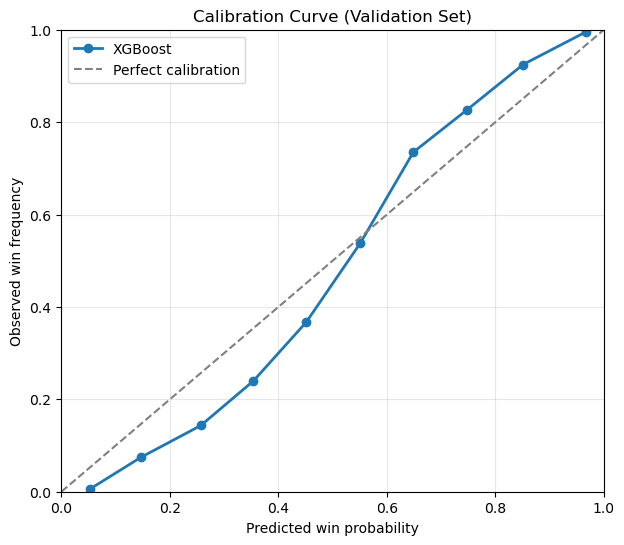

In [53]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Compute calibration
prob_true, prob_pred = calibration_curve(
    y_val,
    val_probs,
    n_bins=10,
    strategy="uniform"
)

plt.figure(figsize=(7, 6))

# Model calibration
plt.plot(
    prob_pred,
    prob_true,
    marker="o",
    linewidth=2,
    label="XGBoost"
)

# Perfect calibration line
plt.plot([0, 1], [0, 1], "--", color="gray", label="Perfect calibration")

plt.xlabel("Predicted win probability")
plt.ylabel("Observed win frequency")
plt.title("Calibration Curve (Validation Set)")
plt.legend()
plt.grid(alpha=0.3)
plt.ylim(0, 1)
plt.xlim(0, 1)

plt.show()

In [54]:
import numpy as np
import matplotlib.pyplot as plt

def winprobgraph_xgb(
    matchID,
    df,
    xgb_model,
    feature_cols
):
    # ----------------------------
    # Filter game data
    # ----------------------------
    gamedata = df[df["MatchID"] == matchID].copy()

    # ----------------------------
    # Create shot index (game timeline)
    # ----------------------------
    gamedata = gamedata.reset_index(drop=True)
    gamedata["ShotIndex"] = np.arange(len(gamedata))

    # ----------------------------
    # Build feature matrix
    # ----------------------------
    X = gamedata[feature_cols]

    # ----------------------------
    # Predict reference-team win prob
    # ----------------------------
    gamedata["RefWinProb"] = xgb_model.predict_proba(X)[:, 1]

    # ----------------------------
    # Opponent win probability
    # ----------------------------
    gamedata["OppWinProb"] = 1.0 - gamedata["RefWinProb"]

    # ----------------------------
    # Identify teams
    # ----------------------------
    ref_team = gamedata["RefTeamID"].iloc[0]
    opp_team = gamedata["OppTeamID"].iloc[0]

    # ----------------------------
    # Plot
    # ----------------------------
    plt.figure(figsize=(12, 6))

    plt.plot(
        gamedata["ShotIndex"],
        gamedata["RefWinProb"],
        label=f"Team {ref_team}",
        linewidth=2
    )

    plt.plot(
        gamedata["ShotIndex"],
        gamedata["OppWinProb"],
        label=f"Team {opp_team}",
        linewidth=2
    )

    plt.axhline(0.5, linestyle="--", color="gray", linewidth=1)
    plt.ylim(0, 1)

    plt.xlabel("Shot (Game Timeline)")
    plt.ylabel("Win Probability")
    plt.title(f"Shot-Level Win Probability (MatchID = {matchID})")
    plt.legend()
    plt.grid(alpha=0.3)

    plt.show()

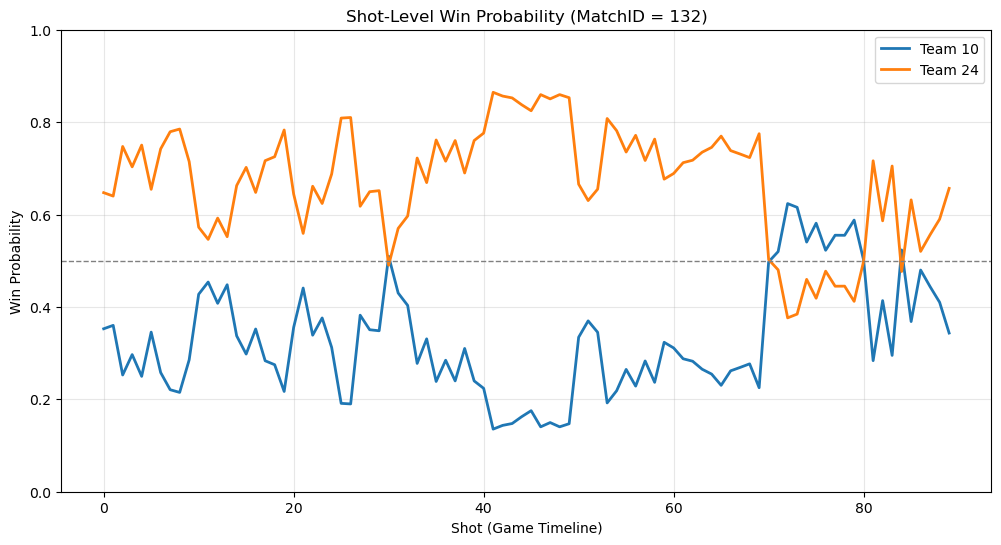

In [90]:
winprobgraph_xgb(
    matchID=132,
    df=nnshots,
    xgb_model=xgb_model,
    feature_cols=feature_cols
)

In [56]:
def get_decision_points(df):
    return df[(df["RefHasHammer"] == 1) & (df["EndID"]<8) & (df["EndID"]>2)
        & (df["RefShotsRemaining"] == 1) & (df["OppShotsRemaining"]  == 0)].copy()

def create_counterfactuals(row):
    base = row.copy()
    score = base.copy()
    score["RefScoreDiff"] += 1
    score["RefHasHammer"] = 0
    score["EndID"] += 1
    score["RefShotsRemaining"] = 5
    score["OppShotsRemaining"] = 5
    score["PowerPlay"] = 0
    for col in score.index:
        if "stone_" in col:
            score[col] = 0
    score["RefClosestDist"] = 1116
    score["OppClosestDist"] = 150
    score["RefOwnStonesInHouse"] = 0
    score["RefOppStonesInHouse"] = 1
    score["OwnStonesCloserThanOpp"] = 0
    score["StonesCrowdedNearButton"] = 1
    score["StonesMediumCrowdedNearButton"] = 1

    punt = base.copy()
    punt["RefHasHammer"] = 1
    punt["EndID"] += 1
    punt["RefShotsRemaining"] = 5
    punt["OppShotsRemaining"] = 5
    punt["PowerPlay"] = 0
    for col in punt.index:
        if "stone_" in col:
            punt[col] = 0
    punt["RefClosestDist"] = 150
    punt["OppClosestDist"] = 1116
    punt["RefOwnStonesInHouse"] = 1
    punt["RefOppStonesInHouse"] = 0
    punt["OwnStonesCloserThanOpp"] = 1
    punt["StonesCrowdedNearButton"] = 1
    punt["StonesMediumCrowdedNearButton"] = 1
    return score, punt

In [57]:
def get_decision_points2(df):
    """
    Selects decision points where the hammer team has exactly
    one shot remaining and the non-hammer team has zero.
    Works for both ref-hammer and opp-hammer situations.
    """
    mask_ref_hammer = (
        (df["RefHasHammer"] == 1) &
        (df["RefShotsRemaining"] == 1) &
        (df["OppShotsRemaining"] == 0)
    )

    mask_opp_hammer = (
        (df["RefHasHammer"] == 0) &
        (df["RefShotsRemaining"] == 0) &
        (df["OppShotsRemaining"] == 1)
    )

    return df[
        (df["EndID"].between(3, 7)) &
        (mask_ref_hammer | mask_opp_hammer)
    ].copy()
    
def create_counterfactuals2(row):
    base = row.copy()
    score = base.copy()
    if row["RefHasHammer"] == 1:
        score["RefScoreDiff"] += 1
    else:
        score["RefScoreDiff"] -= 1
    score["EndID"] += 1
    score["RefShotsRemaining"] = 5
    score["OppShotsRemaining"] = 5
    score["PowerPlay"] = 0
    for col in score.index:
        if "stone_" in col:
            score[col] = 0
    if score["RefHasHammer"] == 1:
        score["RefClosestDist"] = 1116
        score["OppClosestDist"] = 150
        score["RefOwnStonesInHouse"] = 0
        score["RefOppStonesInHouse"] = 1
        score["OwnStonesCloserThanOpp"] = 0
        score["StonesCrowdedNearButton"] = 1
        score["StonesMediumCrowdedNearButton"] = 1
    else:
        score["RefClosestDist"] = 150
        score["OppClosestDist"] = 1116
        score["RefOwnStonesInHouse"] = 1
        score["RefOppStonesInHouse"] = 0
        score["OwnStonesCloserThanOpp"] = 1
        score["StonesCrowdedNearButton"] = 1
        score["StonesMediumCrowdedNearButton"] = 1
    score["RefHasHammer"] = 1 - base["RefHasHammer"]

    punt = base.copy()
    punt["RefHasHammer"] = base["RefHasHammer"]
    punt["EndID"] += 1
    punt["RefShotsRemaining"] = 5
    punt["OppShotsRemaining"] = 5
    punt["PowerPlay"] = 0
    for col in punt.index:
        if "stone_" in col:
            punt[col] = 0
    if punt["RefHasHammer"] ==1:
        punt["RefClosestDist"] = 150
        punt["OppClosestDist"] = 1116
        punt["RefOwnStonesInHouse"] = 1
        punt["RefOppStonesInHouse"] = 0
        punt["OwnStonesCloserThanOpp"] = 1
        punt["StonesCrowdedNearButton"] = 1
        punt["StonesMediumCrowdedNearButton"] = 1
    else:
        punt["RefClosestDist"] = 1116
        punt["OppClosestDist"] = 150
        punt["RefOwnStonesInHouse"] = 0
        punt["RefOppStonesInHouse"] = 1
        punt["OwnStonesCloserThanOpp"] = 0
        punt["StonesCrowdedNearButton"] = 1
        punt["StonesMediumCrowdedNearButton"] = 1
    
    return score, punt

In [58]:
def create_counterfactuals3(row):
    base = row.copy()
    score = base.copy()
    score["RefShotsRemaining"] = 0
    score["RefShotsRemaining"] = 0
    for col in score.index:
        if "stone_" in col:
            score["col"] = 0
    score["RefClosestDist"] = 0
    score["OppClosestDist"] = 4000
    score["RefOwnStonesInHouse"] = 1
    score["RefOppStonesInHouse"] = 0
    score["OwnStonesCloserThanOpp"] = 1
    score["StonesCrowdedNearButton"] = 1
    score["StonesMediumCrowdedNearButton"] = 1

    punt = base.copy()
    punt["RefShotsRemaining"] = 0
    punt["RefShotsRemaining"] = 0
    for col in punt.index:
        if "stone_" in col:
            punt[col] = 4000
    punt["RefClosestDist"] = 4000
    punt["OppClosestDist"] = 4000
    punt["RefOwnStonesInHouse"] = 0
    punt["RefOppStonesInHouse"] = 0
    punt["OwnStonesCloserThanOpp"] = 0
    punt["StonesCrowdedNearButton"] = 0
    punt["StonesMediumCrowdedNearButton"] = 0
    return score, punt

In [59]:
def compute_delta_wp(df, model, feature_cols):
    rows=[]
    for _, row in df.iterrows():
        score_row, punt_row = create_counterfactuals2(row)
        X_score = score_row[feature_cols].values.reshape(1,-1)
        X_punt = punt_row[feature_cols].values.reshape(1,-1)
        wp_score = model.predict_proba(X_score)[0, 1]
        wp_punt = model.predict_proba(X_punt)[0, 1]
        rows.append({"EndID":row["EndID"], "RefScoreDiff": row["RefScoreDiff"], "RefHasHammer": row["RefHasHammer"], "DeltaWP": wp_score - wp_punt})
    return pd.DataFrame(rows)
def normalize_delta_wp(df):
    df = df.copy()
    df["HammerDeltaWP"] = df.apply(
        lambda r: r["DeltaWP"] if r["RefHasHammer"] == 1 else -r["DeltaWP"],
        axis=1)
    return df
def aggregate_decisions(df):
    return df.groupby(["EndID", "RefScoreDiff"]).agg(mean_delta_wp=("HammerDeltaWP", "mean"), 
                                                     count = ("HammerDeltaWP", "size")).reset_index()
    

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

def decision_heatmap(df):
    pivot = df.pivot(index="RefScoreDiff", columns="EndID", values="mean_delta_wp")
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot, cmap="RdBu", center=0, annot=True, fmt=".3f")
    plt.title("Change in Win Probability: Score vs. Punt")
    plt.xlabel("End")
    plt.ylabel("Score Differential (Ref Team)")
    plt.show()

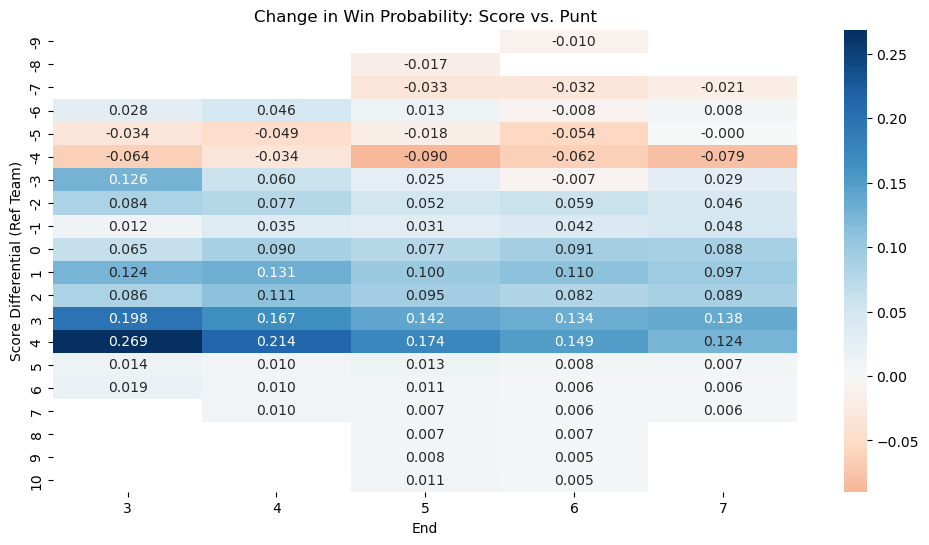

In [61]:
decision_rows_df = get_decision_points2(nnshots)
decision_win_probs = compute_delta_wp(decision_rows_df, xgb_model, feature_cols)
normalized_deltas = normalize_delta_wp(decision_win_probs)
agg_decisions = aggregate_decisions(normalized_deltas)
decision_heatmap(agg_decisions)

In [73]:
import numpy as np

def aggregate_with_ci(df, n_boot=1000, alpha=0.05):
    rows = []
    
    for (end_id, score_diff), g in df.groupby(["EndID", "RefScoreDiff"]):
        values = g["HammerDeltaWP"].values
    
        if len(values) < 10:
            continue  # too little data
        
        boot_means = np.random.choice(
            values,
            size=(n_boot, len(values)),
            replace=True
        ).mean(axis=1)
        
        rows.append({
            "EndID": end_id,
            "RefScoreDiff": score_diff,
            "mean_delta_wp": values.mean(),
            "ci_low": np.percentile(boot_means, 100 * alpha / 2),
            "ci_high": np.percentile(boot_means, 100 * (1 - alpha / 2)),
            "count": len(values)
        })
    
    return pd.DataFrame(rows)

In [74]:
ci_df = aggregate_with_ci(normalized_deltas)

In [77]:
def decision_heatmap_with_ci(df):
    df = df.copy()

    # significance flag per row
    df["significant"] = (df["ci_low"] > 0) | (df["ci_high"] < 0)

    pivot = df.pivot(index="RefScoreDiff", columns="EndID", values="mean_delta_wp")
    sig = df.pivot(index="RefScoreDiff", columns="EndID", values="significant")

    # IMPORTANT: ensure boolean mask
    sig = sig.fillna(False).astype(bool)

    plt.figure(figsize=(12, 6))
    sns.heatmap(
        pivot,
        cmap="RdBu",
        center=0,
        annot=True,
        fmt=".3f",
        mask=~sig
    )
    plt.title("Score vs Punt: Statistically Significant ΔWP Only")
    plt.xlabel("End")
    plt.ylabel("Score Differential (Ref Team)")
    plt.show()

C:\Users\treye\AppData\Local\Temp\ipykernel_31680\373593771.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sig = sig.fillna(False).astype(bool)


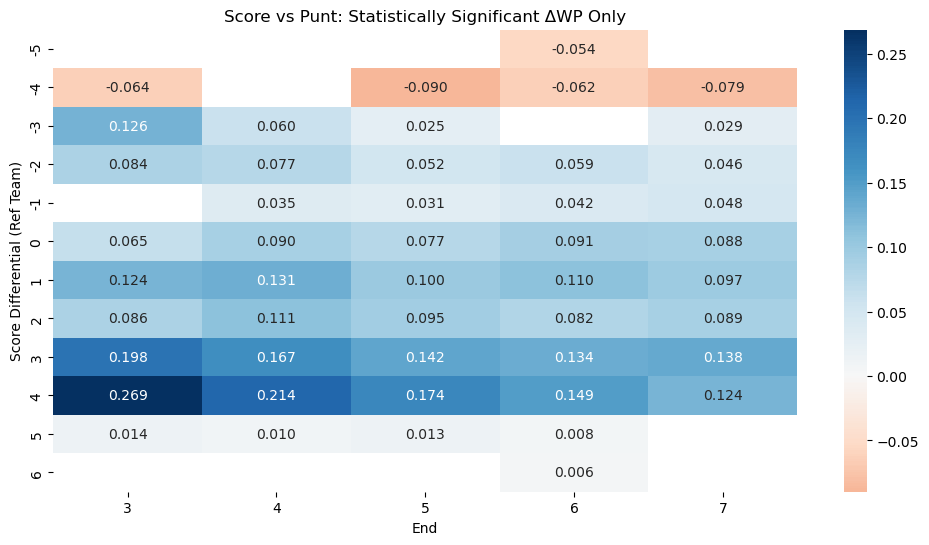

In [78]:
decision_heatmap_with_ci(ci_df)

In [79]:
def decision_certainty_heatmap(df):
    df = df.copy()
    df["certainty"] = abs(df["mean_delta_wp"]) / (df["ci_high"] - df["ci_low"])
    
    pivot = df.pivot(index="RefScoreDiff", columns="EndID", values="certainty")
    
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        pivot,
        cmap="viridis",
        annot=True,
        fmt=".2f"
    )
    plt.title("Decision Certainty (|ΔWP| / CI width)")
    plt.xlabel("End")
    plt.ylabel("Score Differential (Ref Team)")
    plt.show()

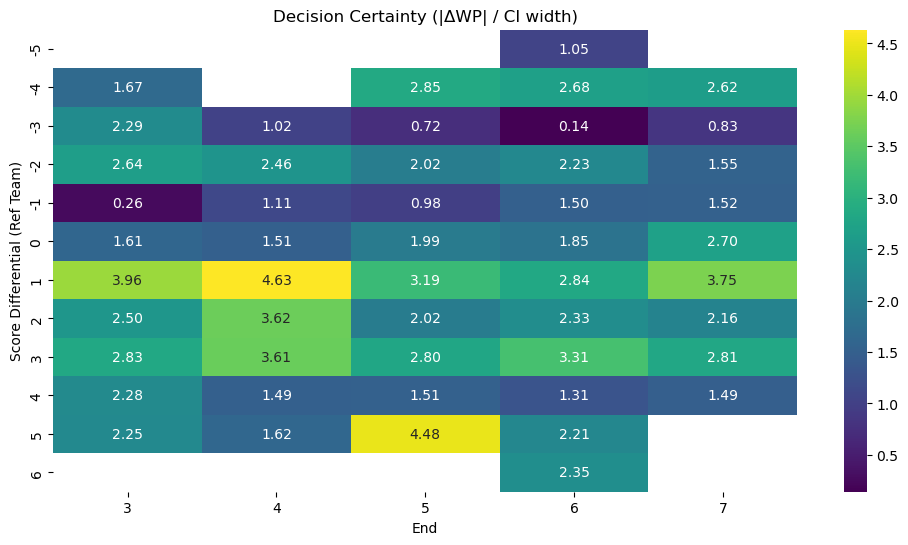

In [80]:
decision_certainty_heatmap(ci_df)

In [64]:
print((nnshots["HasHammer"] == 1).sum())
print(((nnshots["HasHammer"] == 1) & (nnshots["EndID"] < 8)).sum())
print(((nnshots["HasHammer"] == 1) & (nnshots["EndID"] < 8) & (nnshots["EndID"] > 2)).sum())
print(((nnshots["HasHammer"] == 1) & (nnshots["EndID"] < 8) & (nnshots["EndID"] > 2)
       & (nnshots["TeamShotsRemainingInEnd"] == 1)).sum())
print(((nnshots["HasHammer"] == 1) & (nnshots["EndID"] < 8) & (nnshots["EndID"] > 2)
       & (nnshots["TeamShotsRemainingInEnd"] == 1)
       & (nnshots["OpponentShotsRemainingInEnd"] == 0)).sum())

12852
11799
8359
1672
0


In [65]:
row_idx = 25724
row = nnshots.loc[row_idx]
score_row, punt_row = create_counterfactuals(row)
X_score = score_row[feature_cols].values.reshape(1,-1)
X_punt = punt_row[feature_cols].values.reshape(1,-1)
wp_score = xgb_model.predict_proba(X_score)[0, 1]
wp_punt = xgb_model.predict_proba(X_punt)[0, 1]

In [66]:
print(wp_score, wp_punt)

0.06539861 0.15121982


In [67]:
decision_rows_df

,CompetitionID,SessionID,GameID,EndID,TeamID,TeamPlayerID,MatchID,Task,Result,PowerPlay,TeamShotsRemainingInEnd,OpponentShotsRemainingInEnd,ScoreDiffStartOfEnd,OpponentResult,EndDifferential,EndScoringOutcome,HasHammer,stone_1_x,stone_1_y,stone_2_x,stone_2_y,stone_3_x,stone_3_y,stone_4_x,stone_4_y,stone_5_x,stone_5_y,stone_6_x,stone_6_y,stone_7_x,stone_7_y,stone_8_x,stone_8_y,stone_9_x,stone_9_y,stone_10_x,stone_10_y,stone_11_x,stone_11_y,stone_12_x,stone_12_y,stone_1_is_teams,stone_2_is_teams,stone_3_is_teams,stone_4_is_teams,stone_5_is_teams,stone_6_is_teams,stone_7_is_teams,stone_8_is_teams,stone_9_is_teams,stone_10_is_teams,stone_11_is_teams,stone_12_is_teams,stone_1_dist_to_button,stone_2_dist_to_button,stone_3_dist_to_button,stone_4_dist_to_button,stone_5_dist_to_button,stone_6_dist_to_button,stone_7_dist_to_button,stone_8_dist_to_button,stone_9_dist_to_button,stone_10_dist_to_button,stone_11_dist_to_button,stone_12_dist_to_button,stone_1_in_house,stone_2_in_house,stone_3_in_house,stone_4_in_house,stone_5_in_house,stone_6_in_house,stone_7_in_house,stone_8_in_house,stone_9_in_house,stone_10_in_house,stone_11_in_house,stone_12_in_house,OwnStonesInHouse,OppStonesInHouse,StonesInHouseDiff,OwnClosestDist,OppClosestDist,ClosestStoneDiff,OwnStonesCloserThanOpp,TotalStonesInHouse,StonesCrowdedNearButton,StonesMediumCrowdedNearButton,GameTeamID,PowerPlayUsedEnd,HasUsedPowerPlay,WinningTeamID,StoneTeamWonGame,CanonicalTeamID,IsCanonicalTeam,CanonicalTeamWon,RefTeamID,IsRefTeam,RefTeamWon,RefScoreDiff,RefHasHammer,RefShotsRemaining,OppShotsRemaining,RefOwnStonesInHouse,RefOppStonesInHouse,RefClosestDist,OppTeamID
28,0,1,1,3,19,191,11,2,0,0.0,0.0,1.0,1,3,-3,1,0,716.0,1897.0,657.0,1832.0,628.0,674.0,774.0,1096.0,983.0,1420.0,483.0,2594.0,749.0,619.0,759.0,743.0,679.0,943.0,924.0,1190.0,858.0,2277.0,0.0,0.0,1,1,1,1,1,1,0,0,0,0,0,0,1097.526765,1036.181934,175.385290,296.971379,662.336017,1813.759907,181.002762,57.706152,159.655880,427.055032,1480.943280,4000.000000,0,0,1,1,0,0,1,1,1,1,0,0,2,4,-2,175.385290,57.706152,-117.679138,0,6,4,5,0_1_1_19,7.0,0,27,0,19,1,0,19,1,0,1,0,0.0,1.0,2,4,175.385290,27
38,0,1,1,4,27,271,11,0,0,0.0,0.0,1.0,2,1,-1,1,0,750.0,650.0,706.0,1142.0,4095.0,4095.0,885.0,1288.0,4095.0,4095.0,0.0,0.0,768.0,1917.0,768.0,1080.0,803.0,1190.0,884.0,918.0,693.0,1236.0,586.0,1855.0,1,1,0,1,0,0,0,0,0,0,0,0,150.000000,344.818793,4000.000000,506.328944,4000.000000,4000.000000,1117.145022,280.577975,393.584807,178.549713,439.710132,1067.670829,1,1,0,1,0,0,0,1,1,1,1,0,3,4,-1,150.000000,150.000000,28.549713,1,7,2,5,0_1_1_27,6.0,0,27,1,19,0,0,19,0,0,-2,1,1.0,0.0,4,3,178.549713,27
48,0,1,1,5,19,191,11,2,2,0.0,0.0,1.0,-1,0,2,0,0,4095.0,0.0,749.0,1174.0,673.0,486.0,638.0,898.0,845.0,684.0,911.0,2406.0,750.0,650.0,807.0,499.0,691.0,1242.0,4095.0,4095.0,850.0,953.0,0.0,0.0,1,1,1,1,1,1,0,0,0,0,0,0,3439.334965,374.001337,323.303263,148.822041,149.936653,1614.049875,150.000000,306.349474,445.920396,4000.000000,182.781290,4000.000000,0,1,1,1,1,0,1,1,1,0,1,0,4,4,0,148.822041,150.000000,1.177959,2,8,4,7,0_1_1_19,7.0,0,27,0,19,1,0,19,1,0,-1,0,0.0,1.0,4,4,148.822041,27
58,0,1,1,6,19,191,11,6,0,0.0,0.0,1.0,1,1,-1,1,0,1089.0,1916.0,4095.0,0.0,1101.0,921.0,349.0,704.0,676.0,500.0,501.0,665.0,1150.0,843.0,4095.0,0.0,261.0,743.0,1021.0,1197.0,4095.0,0.0,0.0,0.0,1,1,1,1,1,1,0,0,0,0,0,0,1166.352005,3439.334965,371.270791,412.331178,308.991909,283.241946,402.304611,3439.334965,492.310877,480.676606,3439.334965,4000.000000,0,0,1,1,1,1,1,0,1,1,0,0,4,3,1,283.241946,402.304611,119.062665,3,7,0,3,0_1_1_19,7.0,0,27,0,19,1,0,19,1,0,1,0,0.0,1.0,4,3,283.241946,27
68,0,1,1,7,27,271,11,2,3,0.0,0.0,1.0,0,0,3,0,0,1235.0,603.0,1103.0,1015.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,0.0,0.0,1089.0,1916.0,1098.0,921.0,652.0,794.0,4095.0,0.0,732.0,830.0,723.0,2251.0,1,1,0,0,0,0,0,0,0,0,0,0,523.482569,413.320699,4000.000000,4000.000000,4000.000000,4000.000000,1166.352005,368.435883,98.183502,3439.334965,34.985711,1451.251184,1,1,0,0,0,0,0,1,1,0,1,0,2,3,-1,413.320699,41

In [68]:
pd.set_option('display.max_rows', None)
print(decision_win_probs)
pd.reset_option('display.max_rows')

      EndID  RefScoreDiff  RefHasHammer   DeltaWP
0         3             1             0 -0.042642
1         4            -2             1  0.030739
2         5            -1             0 -0.025650
3         6             1             0 -0.041746
4         7             0             1  0.037263
5         3             0             0 -0.011499
6         4            -1             1  0.009648
7         5             0             0 -0.033084
8         6             1             0 -0.068651
9         7            -2             1  0.044267
10        3             2             0  0.029442
11        4             0             1  0.023942
12        5             1             0 -0.017324
13        6             0             1  0.021778
14        7             2             0  0.044075
15        3            -2             1  0.026517
16        4            -3             1  0.017131
17        5            -1             0 -0.015825
18        6            -2             1  0.019172
